# <span style="color: brown">Task 7: Support Vector Machines (SVM)</span>
* Objective: Use SVMs for linear and non-linear classification.
* Tools: Scikit-learn, NumPy, Matplotlib

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

**Step 1 : Load the data**
* Map diagnosis to binary labels: Malignant = 1, Benign = 0

In [6]:
df = pd.read_csv('breast-cancer.csv')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Step 2 : Select two features for visualization**
* Split into training and test sets

In [8]:
features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['diagnosis'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

* Train Linear SVM

In [10]:
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train, y_train)

SVC(kernel='linear')

* Train RBF SVM

In [11]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale')
rbf_svm.fit(X_train, y_train)

SVC()

**Setp 3 : Function to plot decision boundary**

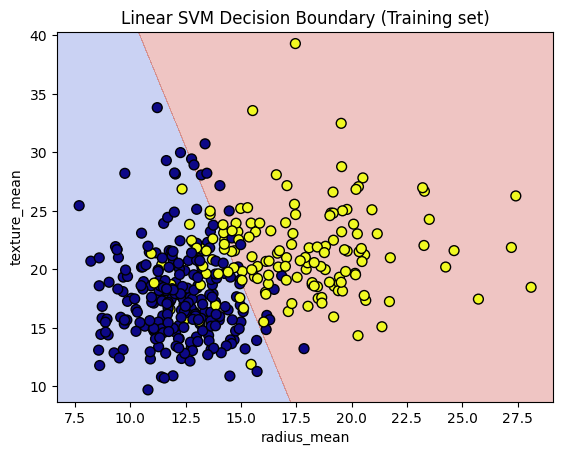

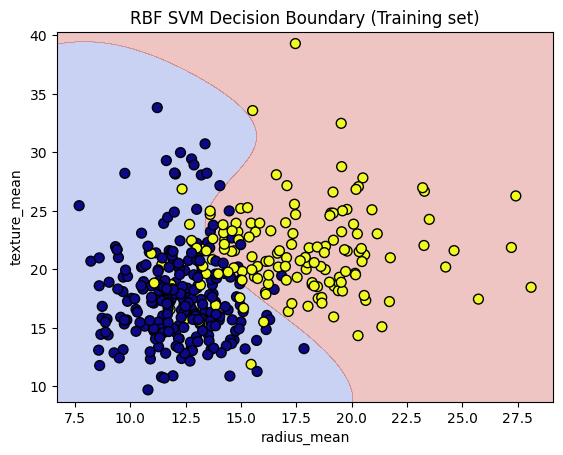

In [18]:
def plot_decision_boundary(svm, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.plasma, s=50)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.show()

plot_decision_boundary(linear_svm, X_train, y_train, "Linear SVM Decision Boundary (Training set)")
plot_decision_boundary(rbf_svm, X_train, y_train, "RBF SVM Decision Boundary (Training set)")

* Hyperparameter tuning with GridSearchCV for RBF kernel

In [15]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found by GridSearchCV: {'C': 1, 'gamma': 'scale'}


* Evaluate best model on test data

In [16]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred))

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       108
           1       0.91      0.81      0.86        63

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171

Confusion Matrix on Test Set:
[[103   5]
 [ 12  51]]


* Plot decision boundary for the best model on test data

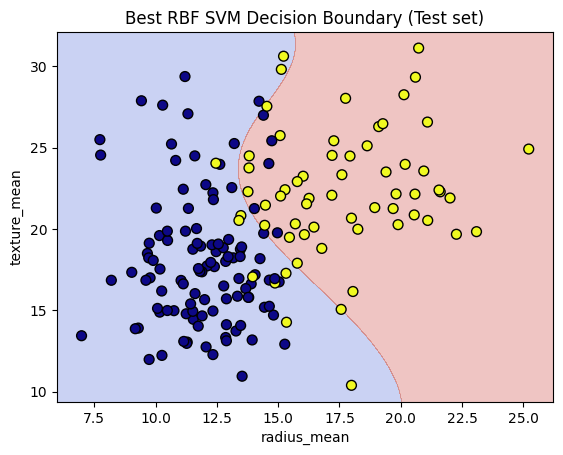

In [19]:
plot_decision_boundary(best_svm, X_test, y_test, "Best RBF SVM Decision Boundary (Test set)")